In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/dataset tech 405/Sports.csv')

#Separate X (Text) and Y (Label)
X = data['Text'].values
Y = data['Label'].values

#Tokenizer of X
tokenizer = Tokenizer(num_words=5000, oov_token='oov')  # Handle out-of-vocabulary words
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_tokenized, maxlen=100)  # Padding to ensure uniform input size

#Label encode Y
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y_encoded, test_size=0.2, random_state=42)

In [ ]:
#Create the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    SimpleRNN(128, activation='relu', return_sequences=False),  # Reduced units
    Dropout(0.3),  # Added dropout
    Dense(81, activation='relu'),  # Reduced dense layer size
    Dropout(0.3),  # Added dropout
    Dense(64, activation='relu'),  # Reduced dense layer size
    Dropout(0.3),  # Added dropout
    Dense(32, activation='relu'),  # Reduced dense layer size
    Dropout(0.3),  # Added dropout
    Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

#Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4420 - loss: 0.6954 - val_accuracy: 0.4444 - val_loss: 0.6926
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5494 - loss: 0.6881 - val_accuracy: 0.4444 - val_loss: 0.6923
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6378 - loss: 0.6866 - val_accuracy: 0.5556 - val_loss: 0.6916
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6464 - loss: 0.6860 - val_accuracy: 0.5556 - val_loss: 0.6918
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6967 - loss: 0.6868 - val_accuracy: 0.5556 - val_loss: 0.6919
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6759 - loss: 0.6790 - val_accuracy: 0.5556 - val_loss: 0.6915
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6967 - loss: 0.6774 - val_accuracy: 0.4444 - val_loss: 0.6908
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7937 - loss: 0.6736 - val_accuracy: 0.4444 - val_loss: 0.6896
Epoch 9/50
2

In [ ]:
#Prediction of sentiments
new_sentences = [
    "Football is fun to watch and enjoy ", "Nepal is very good at cricket",
    "Ronaldo and Messi are good football players",
    "The unexpected resignation of the coach has left the team in disarray",
    "Sports fandom can foster a sense of community and belonging among fans."
]

# Tokenize and pad new sentences
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=100)

# Predict using the trained model
predictions = model.predict(new_padded)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Label encoding and display predictions
decoded_labels = label_encoder.inverse_transform(predicted_labels.flatten())
for i, sentence in enumerate(new_sentences):
    print(f"Sentence: '{sentence}' --> Sentiment: {decoded_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Sentence: 'Football is fun to watch and enjoy ' --> Sentiment: positive
Sentence: 'Nepal is very good at cricket' --> Sentiment: negative
Sentence: 'Ronaldo and Messi are good football players' --> Sentiment: positive
Sentence: 'The unexpected resignation of the coach has left the team in disarray' --> Sentiment: negative
Sentence: 'Sports fandom can foster a sense of community and belonging among fans.' --> Sentiment: positive


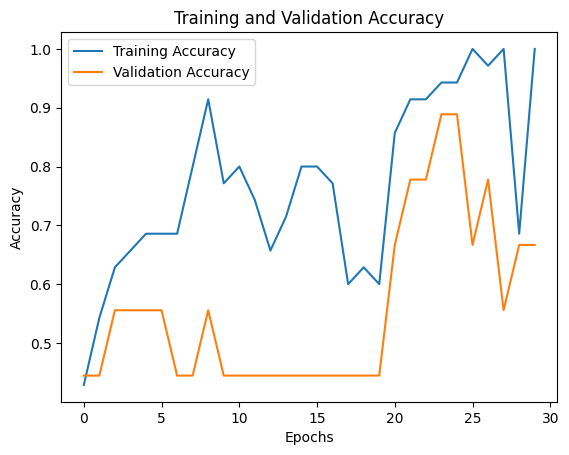

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()